
**Predicting GDP Growth using Machine Learning approaches**

In [70]:
#Loading requeired modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

from scipy import stats
from google.colab import drive
from scipy.stats import skew, kurtosis
from IPython.display import HTML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Dense, Dropout,Conv2D, MaxPooling2D, Flatten
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,VotingRegressor, BaggingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional
from keras.optimizers import Adam
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from tensorflow.keras.callbacks import EarlyStopping
from statsmodels.tsa.stattools import adfuller
import itertools
from statsmodels.tsa.arima.model import ARIMA




In [71]:
# This code mounts Google Drive to your Colab environment, enabling access to files in Google Drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
#Loading data
path = "/content/drive/My Drive/Colab Notebooks/Research_SA GDP/GDP P0441 - GDP Time series.xlsx"
df_gdp = pd.read_excel(path, sheet_name='AnnualP')
# viewing data
df_gdp.head()

,H01,H02,H03,H04,H05,H06,H15,H17,H25,Y1993,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
0,P0441,Gross domestic product,AN1001P,Value added at basic prices,"Agriculture, forestry and fishing",NaN,Current prices,Year-on-year percentage change,Annually,NaN,...,17.886498,12.385447,16.347739,10.213114,-4.259308,-9.514766,30.749500,7.890059,16.538878,1.910638
1,P0441,Gross domestic product,AN1002P,Value added at basic prices,Mining and quarrying,NaN,Current prices,Year-on-year percentage change,Annually,NaN,...,0.388459,-4.737984,10.424985,6.626727,7.186610,9.389010,11.710347,36.016841,2.174001,-9.049896
2,P0441,Gross domestic product,AN1003P,Value added at basic prices,Manufacturing,NaN,Current prices,Year-on-year percentage change,Annually,NaN,...,7.840717,7.259725,7.367920,6.943017,5.142359,4.412749,-6.499580,15.012803,10.264543,10.074282
3,P0441,Gross domestic product,AN1004P,Value added at basic prices,"Electricity, gas and water",NaN,Current prices,Year-on-year percentage change,Annually,NaN,...,8.997309,9.493580,10.227076,7.803985,5.707791,5.353278,3.706955,12.456672,11.726617,11.545422
4,P0441,Gross domestic product,AN1005P,Value added at basic prices,Construction,NaN,Current prices,Year-on-year percentage change,Annually,NaN,...,5.741758,5.772568,4.285560,-0.432129,2.288163,1.405957,-16.637531,3.324063,3.231776,5.361122


**Understanding data structure**

In [73]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   H01     246 non-null    object 
 1   H02     246 non-null    object 
 2   H03     246 non-null    object 
 3   H04     246 non-null    object 
 4   H05     246 non-null    object 
 5   H06     126 non-null    object 
 6   H15     246 non-null    object 
 7   H17     246 non-null    object 
 8   H25     246 non-null    object 
 9   Y1993   0 non-null      float64
 10  Y1994   242 non-null    float64
 11  Y1995   242 non-null    float64
 12  Y1996   242 non-null    float64
 13  Y1997   242 non-null    float64
 14  Y1998   242 non-null    float64
 15  Y1999   242 non-null    float64
 16  Y2000   242 non-null    float64
 17  Y2001   242 non-null    float64
 18  Y2002   242 non-null    float64
 19  Y2003   242 non-null    float64
 20  Y2004   242 non-null    float64
 21  Y2005   242 non-null    float64
 22  Y2

In [74]:
df_gdp.describe()

,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
count,0.0,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,...,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,NaN,11.065874,11.251862,8.883243,9.652615,16.755735,2.603531,8.759698,8.077934,10.836813,...,4.949567,5.422983,4.901153,1.912904,2.619383,13.379181,-7.249226,6.926988,6.801630,5.813454
std,NaN,13.604423,13.072793,10.569065,12.538965,51.146907,13.004999,14.763194,11.589908,14.733653,...,13.637733,14.137146,15.312753,9.260591,10.855302,103.812194,13.390902,15.451331,9.084469,10.506304
min,NaN,-41.758893,-81.000000,-45.769241,-11.887047,-24.026147,-75.156038,-38.448935,-51.724138,-21.049841,...,-28.976287,-28.335497,-24.319667,-40.296942,-42.553697,-35.300304,-47.512356,-56.154082,-18.126256,-18.532092
25%,NaN,3.291960,5.597090,4.199539,2.955006,0.638024,-1.061496,3.358323,2.635110,2.978392,...,0.714653,1.368224,-0.562122,-0.974610,-0.711341,-1.298625,-14.648835,2.661094,1.777489,0.598972
50%,NaN,11.228641,12.642614,9.319918,8.454397,6.848789,4.161517,8.516111,7.218517,8.894976,...,4.918029,5.056973,4.132457,2.708801,3.080234,2.503605,-7.451027,6.603784,5.697695,4.888114
75%,NaN,16.490122,16.809018,13.653523,12.614824,12.148716,9.449138,13.893514,12.399512,15.669292,...,7.883306,8.184241,8.218088,6.694647,6.657996,5.447306,-0.623493,12.043435,11.370046,8.718860
max,NaN,83.717839,50.274123,43.094392,113.460183,425.000000,52.380952,120.928030,71.354705,114.285714,...,127.620916,109.233348,145.610915,44.630786,49.084290,1142.229337,50.535226,96.902885,39.352236,65.073309


In [75]:
#Dropping irrelevant columns
df_gdp_new =df_gdp.drop(['H01', 'H02', 'H03','H06','H17', 'H25','Y1993'], axis=1)
df_gdp_new.head()


,H04,H05,H15,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
0,Value added at basic prices,"Agriculture, forestry and fishing",Current prices,24.348077,-5.013467,23.314549,6.055466,0.909811,2.680198,4.508968,...,17.886498,12.385447,16.347739,10.213114,-4.259308,-9.514766,30.749500,7.890059,16.538878,1.910638
1,Value added at basic prices,Mining and quarrying,Current prices,6.233902,5.494025,13.308153,4.674588,14.988630,14.448457,24.526629,...,0.388459,-4.737984,10.424985,6.626727,7.186610,9.389010,11.710347,36.016841,2.174001,-9.049896
2,Value added at basic prices,Manufacturing,Current prices,11.359723,15.528998,7.473251,9.012204,5.421619,4.914200,16.482980,...,7.840717,7.259725,7.367920,6.943017,5.142359,4.412749,-6.499580,15.012803,10.264543,10.074282
3,Value added at basic prices,"Electricity, gas and water",Current prices,14.739754,8.950873,6.903779,7.078927,2.757192,3.615000,7.509747,...,8.997309,9.493580,10.227076,7.803985,5.707791,5.353278,3.706955,12.456672,11.726617,11.545422
4,Value added at basic prices,Construction,Current prices,11.977523,14.274199,11.805707,12.458782,0.641267,1.400423,4.337618,...,5.741758,5.772568,4.285560,-0.432129,2.288163,1.405957,-16.637531,3.324063,3.231776,5.361122


In [76]:
#Total number of rows and columns
df_gdp_new.shape

(246, 33)

In [77]:
#Identifying the missing values
missing_values = (df_gdp_new.isnull() | df_gdp_new.empty | df_gdp_new.isna()).sum()
missing_values

,0
H04,0
H05,0
H15,0
Y1994,4
Y1995,4
Y1996,4
Y1997,4
Y1998,4
Y1999,4
Y2000,4


In [78]:
# There were no data througout the years
#Drop rows with missing values
df_gpd_cleaned = df_gdp_new.dropna()


**Filter data related to GDP at market price**

In [79]:
# Rename columns
df_gdp_new.rename(columns={
    'H04': 'Economic Indicator',
    'H05': 'Economic Indicator Subcategory'
}, inplace=True)

# Filter data related to GDP at market price
filtered_h04 = df_gdp_new[df_gdp_new['Economic Indicator'].isin([
    'Value added at basic prices',
    'GDP at market prices'
])]

filtered_h15 = filtered_h04[filtered_h04['H15'] == 'Constant 2015 prices']

filtered_h05 = filtered_h15[~filtered_h15['Economic Indicator Subcategory'].isin([
    'Value added at basic prices (total)',
    'Primary industries',
    'Secondary industries',
    'Tertiary industries'
])]

# Drop unnecessary columns
filtered_df_gdp = filtered_h05.drop(columns=['H15', 'Economic Indicator'])

# Display the filtered and updated DataFrame
print(filtered_df_gdp)


                 Economic Indicator Subcategory     Y1994      Y1995  \
134           Agriculture, forestry and fishing  7.900000 -19.900000   
135                        Mining and quarrying  0.500000  -3.100000   
136                               Manufacturing  2.700000   6.500000   
137                  Electricity, gas and water  5.800000   2.000000   
138                                Construction  2.898626   3.548883   
139           Trade, catering and accommodation  2.500000   5.900000   
140        Transport, storage and communication  4.600000  10.600000   
141  Finance, real estate and business services  3.653676   3.507293   
142                 General government services  0.996648   0.842097   
143                           Personal services  4.870942   5.517047   
146                        GDP at market prices  3.200000   3.100000   

         Y1996     Y1997     Y1998     Y1999     Y2000     Y2001     Y2002  \
134  24.000000  0.900000 -5.300000  6.200000  4.700000 -3

In [80]:
#Transpose the DataFrame
transposed_df_gdp = filtered_df_gdp.transpose()

# Display the transposed DataFrame
print(transposed_df_gdp)

                                                              134  \
Economic Indicator Subcategory  Agriculture, forestry and fishing   
Y1994                                                         7.9   
Y1995                                                       -19.9   
Y1996                                                        24.0   
Y1997                                                         0.9   
Y1998                                                        -5.3   
Y1999                                                         6.2   
Y2000                                                         4.7   
Y2001                                                        -3.3   
Y2002                                                         6.5   
Y2003                                                     0.68107   
Y2004                                                     0.85944   
Y2005                                                    2.809786   
Y2006                             

In [81]:
#Set the first row as the header
transposed_df_gdp.columns = transposed_df_gdp.iloc[0]  # Set the first row as header
transposed_df_gdp = transposed_df_gdp.drop(transposed_df_gdp.index[0])  # Drop the first row

# Reset the index and rename the index to 'Year'
transposed_df_gdp = transposed_df_gdp.reset_index().rename(columns={'index': 'Year'})

# Display the transposed DataFrame with new headings
print(transposed_df_gdp)

Economic Indicator Subcategory   Year Agriculture, forestry and fishing  \
0                               Y1994                               7.9   
1                               Y1995                             -19.9   
2                               Y1996                              24.0   
3                               Y1997                               0.9   
4                               Y1998                              -5.3   
5                               Y1999                               6.2   
6                               Y2000                               4.7   
7                               Y2001                              -3.3   
8                               Y2002                               6.5   
9                               Y2003                           0.68107   
10                              Y2004                           0.85944   
11                              Y2005                          2.809786   
12                       

In [82]:
transposed_df_gdp.head()

Economic Indicator Subcategory,Year,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas and water",Construction,"Trade, catering and accommodation","Transport, storage and communication","Finance, real estate and business services",General government services,Personal services,GDP at market prices
0,Y1994,7.9,0.5,2.7,5.8,2.898626,2.5,4.6,3.653676,0.996648,4.870942,3.2
1,Y1995,-19.9,-3.1,6.5,2.0,3.548883,5.9,10.6,3.507293,0.842097,5.517047,3.1
2,Y1996,24.0,-0.8,1.4,10.8,2.015973,3.7,6.1,6.785371,1.931166,2.6582,4.3
3,Y1997,0.9,1.7,2.7,3.9,3.442724,0.4,7.6,4.706087,0.788902,-0.032718,2.6
4,Y1998,-5.3,-0.1,-0.2,-6.3,-5.894375,1.3,5.5,2.302056,-0.748263,6.211221,0.5


In [83]:
#Checking the missing values
missing_values = (transposed_df_gdp.isnull() | transposed_df_gdp.empty | transposed_df_gdp.isna()).sum()
missing_values

,0
Economic Indicator Subcategory,
Year,0
"Agriculture, forestry and fishing",0
Mining and quarrying,0
Manufacturing,0
"Electricity, gas and water",0
Construction,0
"Trade, catering and accommodation",0
"Transport, storage and communication",0
"Finance, real estate and business services",0


**Statistical summary**

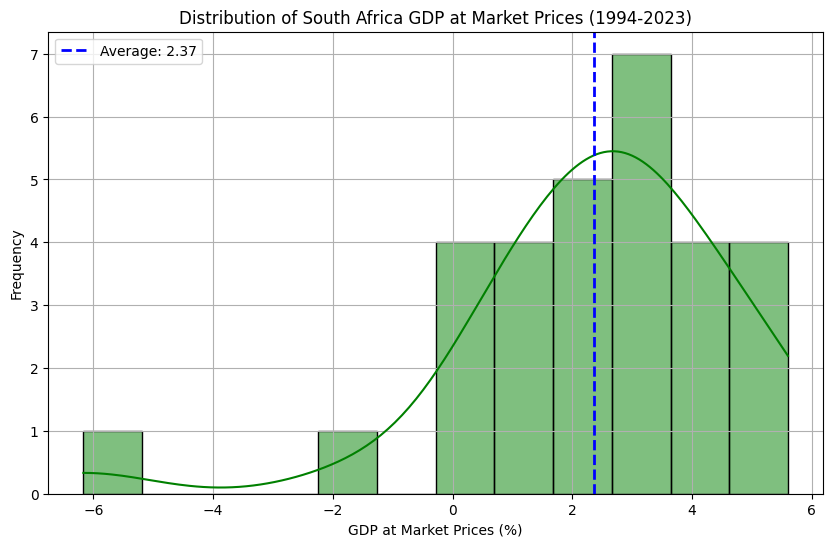

Average GDP at Market Prices: 2.37


In [84]:

gdp_at_market_prices = transposed_df_gdp['GDP at market prices']

# Calculate the average GDP at market prices
gdp_average = gdp_at_market_prices.mean()

# Plot the histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(gdp_at_market_prices, bins=12, kde=True, color='green', edgecolor='black')

# Add labels and title
plt.title('Distribution of South Africa GDP at Market Prices (1994-2023)')
plt.xlabel('GDP at Market Prices (%)')
plt.ylabel('Frequency')

# Add a vertical line for the average GDP value
plt.axvline(gdp_average, color='blue', linestyle='dashed', linewidth=2, label=f'Average: {gdp_average:.2f}')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Print the average GDP at market prices
print(f'Average GDP at Market Prices: {gdp_average:.2f}')


In [85]:
# Remove the "Y" prefix and convert to integers
transposed_df_gdp['Year'] = transposed_df_gdp['Year'].astype(str).str.replace('Y', '').astype(int)

# Display the updated DataFrame to verify
print(transposed_df_gdp)

Economic Indicator Subcategory  Year Agriculture, forestry and fishing  \
0                               1994                               7.9   
1                               1995                             -19.9   
2                               1996                              24.0   
3                               1997                               0.9   
4                               1998                              -5.3   
5                               1999                               6.2   
6                               2000                               4.7   
7                               2001                              -3.3   
8                               2002                               6.5   
9                               2003                           0.68107   
10                              2004                           0.85944   
11                              2005                          2.809786   
12                              2006  

**Data visualisation**

**GDP growth rate over a period of time**

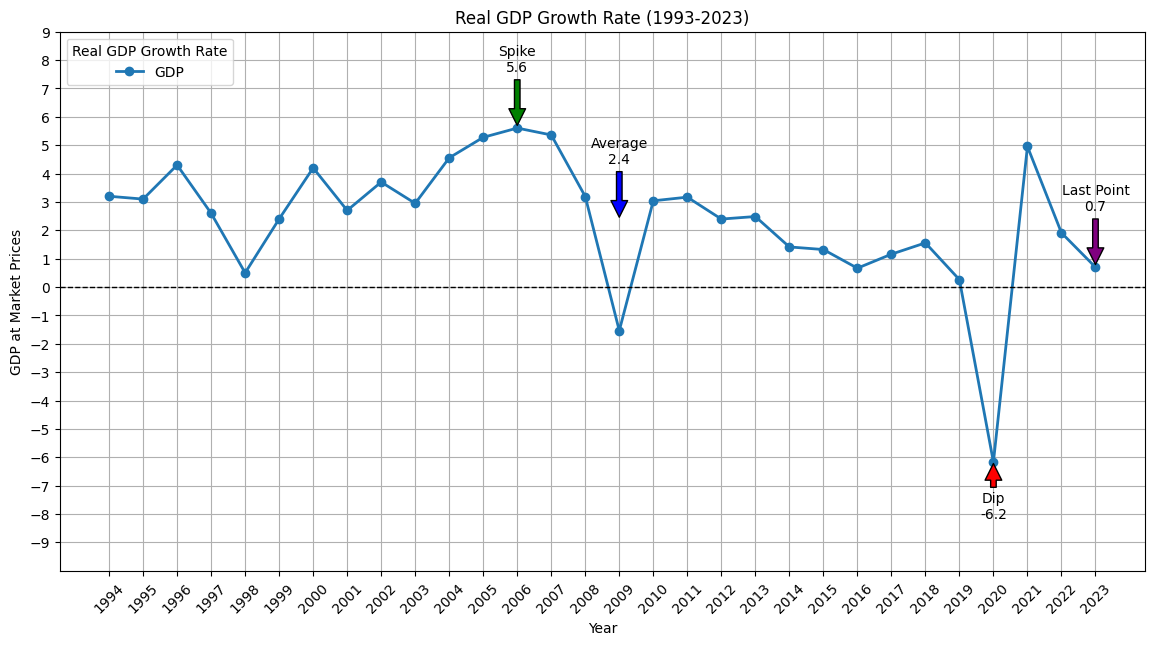

In [86]:
# Convert the 'Year' column to integer
transposed_df_gdp['Year'] = transposed_df_gdp['Year'].astype(int)

# Extract the necessary columns
years = transposed_df_gdp['Year']
gdp_at_market_prices = transposed_df_gdp['GDP at market prices']

# Plotting the graph
plt.figure(figsize=(14, 7))
plt.plot(years, gdp_at_market_prices, marker='o', linestyle='-', linewidth=2, label='GDP')

# Add annotations for key points
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Identify key points for annotation
max_point = gdp_at_market_prices.max()
min_point = gdp_at_market_prices.min()
last_point = gdp_at_market_prices.iloc[-1]
average_value = gdp_at_market_prices.mean()

# Annotate the points
plt.annotate(f'Spike\n{max_point:.1f}',
             xy=(years[gdp_at_market_prices.idxmax()], max_point),
             xytext=(years[gdp_at_market_prices.idxmax()], max_point + 2),
             arrowprops=dict(facecolor='green', shrink=0.05),
             horizontalalignment='center')

plt.annotate(f'Dip\n{min_point:.1f}',
             xy=(years[gdp_at_market_prices.idxmin()], min_point),
             xytext=(years[gdp_at_market_prices.idxmin()], min_point - 2),
             arrowprops=dict(facecolor='red', shrink=0.05),
             horizontalalignment='center')

plt.annotate(f'Average\n{average_value:.1f}',
             xy=(years.iloc[len(years) // 2], average_value),
             xytext=(years.iloc[len(years) // 2], average_value + 2),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             horizontalalignment='center')

plt.annotate(f'Last Point\n{last_point:.1f}',
             xy=(years.iloc[-1], last_point),
             xytext=(years.iloc[-1], last_point + 2),
             arrowprops=dict(facecolor='purple', shrink=0.05),
             horizontalalignment='center')



# Set labels, title, and grid
plt.title('Real GDP Growth Rate (1993-2023)')
plt.xlabel('Year')
plt.ylabel('GDP at Market Prices')
# Set xticks to show all years
plt.xticks(ticks=years, rotation=45)
#plt.xticks(ticks=range(years.min(), years.max() + 1, 2), rotation=45)
plt.grid(True)
plt.ylim(-10, 9)
plt.yticks(range(-9, 10, 1))
plt.legend(title='Real GDP Growth Rate', loc='upper left')

# Display the plot
plt.show()



**Economic industry classification**

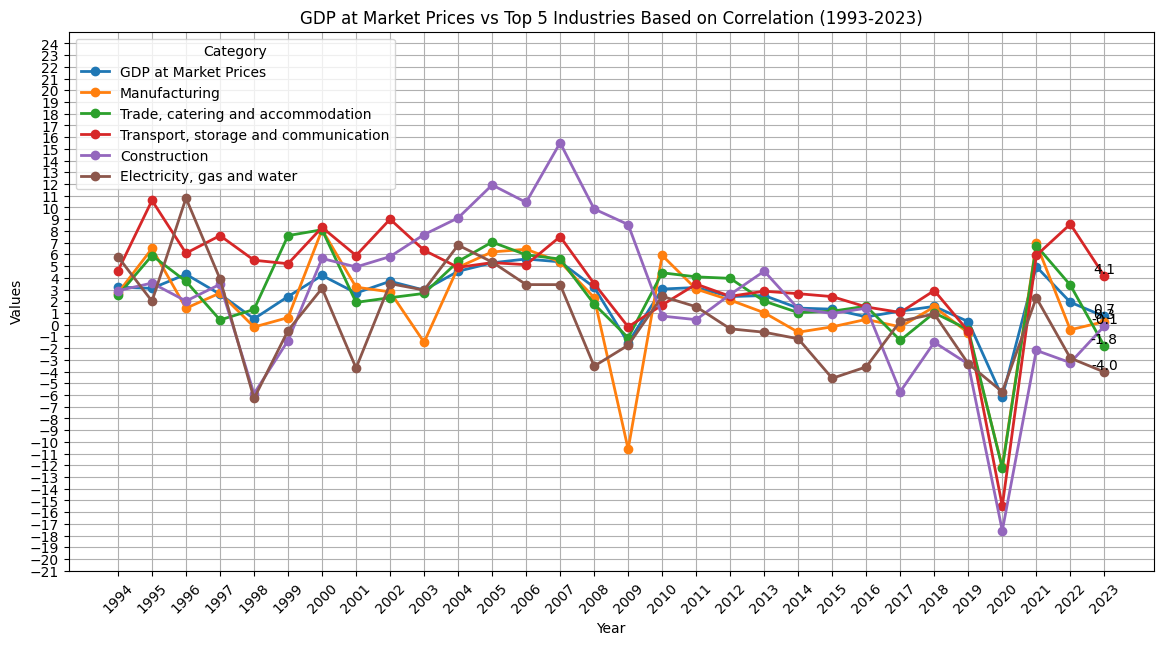

In [87]:
# Extract the necessary columns
years = transposed_df_gdp['Year']
gdp_at_market_prices = transposed_df_gdp['GDP at market prices']

# List of industries
industries = [
    'Agriculture, forestry and fishing',
    'Mining and quarrying',
    'Manufacturing',
    'Electricity, gas and water',
    'Construction',
    'Trade, catering and accommodation',
    'Transport, storage and communication',
    'Finance, real estate and business services',
    'General government services',
    'Personal services'
]

# Calculate the correlation between each industry and GDP at market prices
industry_correlations = transposed_df_gdp[industries].corrwith(gdp_at_market_prices).sort_values(ascending=False)

# Select the top 5 industries based on correlation
top_5_industries = industry_correlations.index[:5]

# Plotting the graph
plt.figure(figsize=(14, 7))
plt.plot(years, gdp_at_market_prices, marker='o', linestyle='-', linewidth=2, label='GDP at Market Prices')

# Plot the top 5 industries
for industry in top_5_industries:
    plt.plot(years, transposed_df_gdp[industry], marker='o', linestyle='-', linewidth=2, label=industry)

# Add data point annotations for the last point of each line (without pointers)
plt.text(years.iloc[-1], gdp_at_market_prices.iloc[-1], f'{gdp_at_market_prices.iloc[-1]:.1f}', ha='center', va='bottom')

# Annotate the last points for the top 5 industries
for industry in top_5_industries:
    plt.text(years.iloc[-1], transposed_df_gdp[industry].iloc[-1], f'{transposed_df_gdp[industry].iloc[-1]:.1f}', ha='center', va='bottom')

# Set labels, title, and grid
plt.title('GDP at Market Prices vs Top 5 Industries Based on Correlation (1993-2023)')
plt.xlabel('Year')
plt.ylabel('Values')

# Set y-axis to show numbers from -20 to 20
plt.ylim(-21, 25)
plt.yticks(range(-21, 25, 1))

# Set xticks to show all years
plt.xticks(ticks=years, rotation=45)
plt.grid(True)
plt.legend(title='Category', loc='upper left')

# Display the plot
plt.show()


**Correlation Matrix**

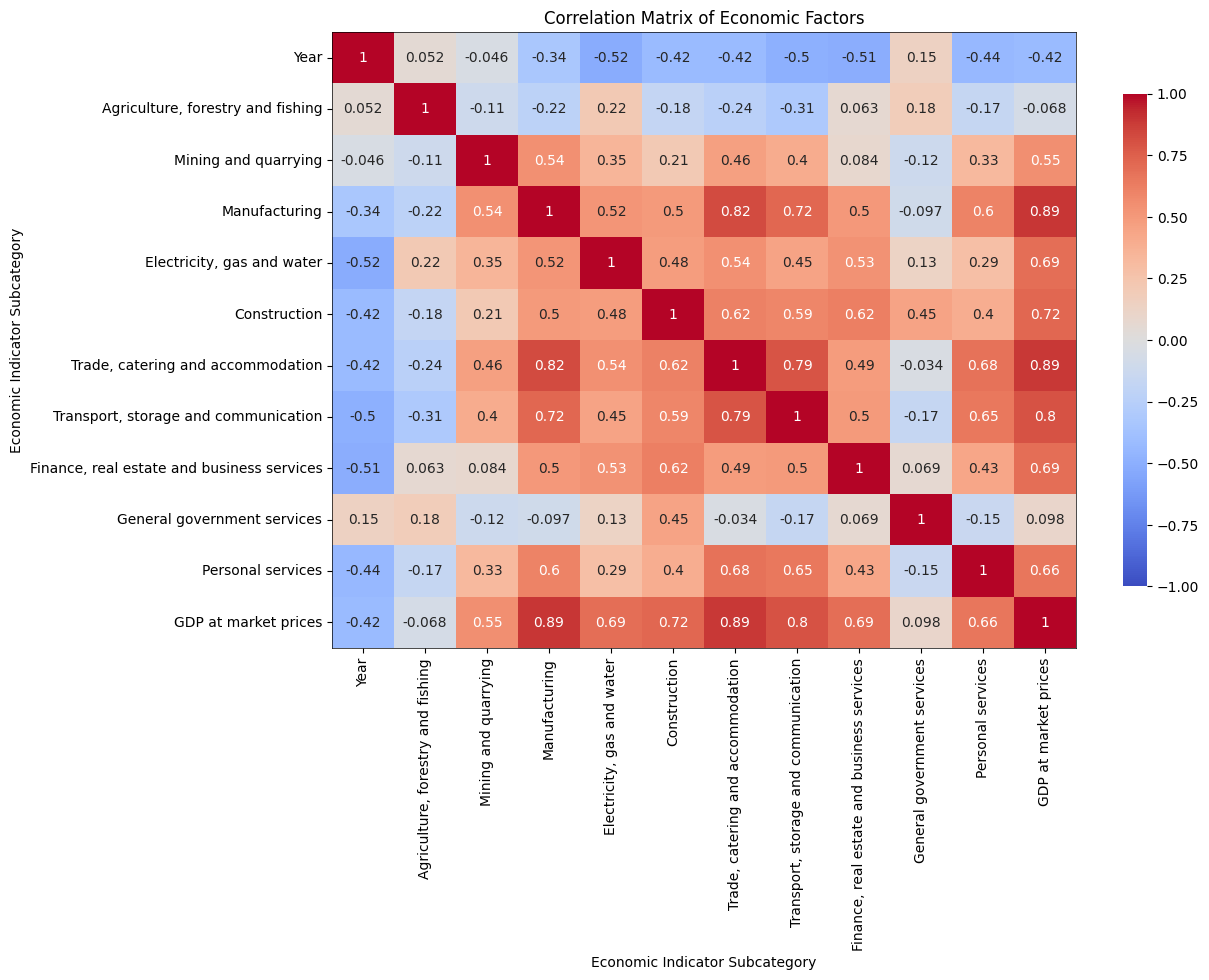

In [88]:
# Compute Pearson correlation coefficients
correlation_matrix = transposed_df_gdp.corr()

# Visualizing the correlation matrix with a thin outer border and no inner borders
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0, linecolor='black', cbar_kws={'shrink': 0.8})

# Draw a thin border around the correlation box (heatmap area)
heatmap.spines['top'].set_visible(True)
heatmap.spines['right'].set_visible(True)
heatmap.spines['bottom'].set_visible(True)
heatmap.spines['left'].set_visible(True)

# Set thin border color and thickness
for _, spine in heatmap.spines.items():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.5)  # Set to thin border

plt.title('Correlation Matrix of Economic Factors')
plt.show()

**Checking outlier**

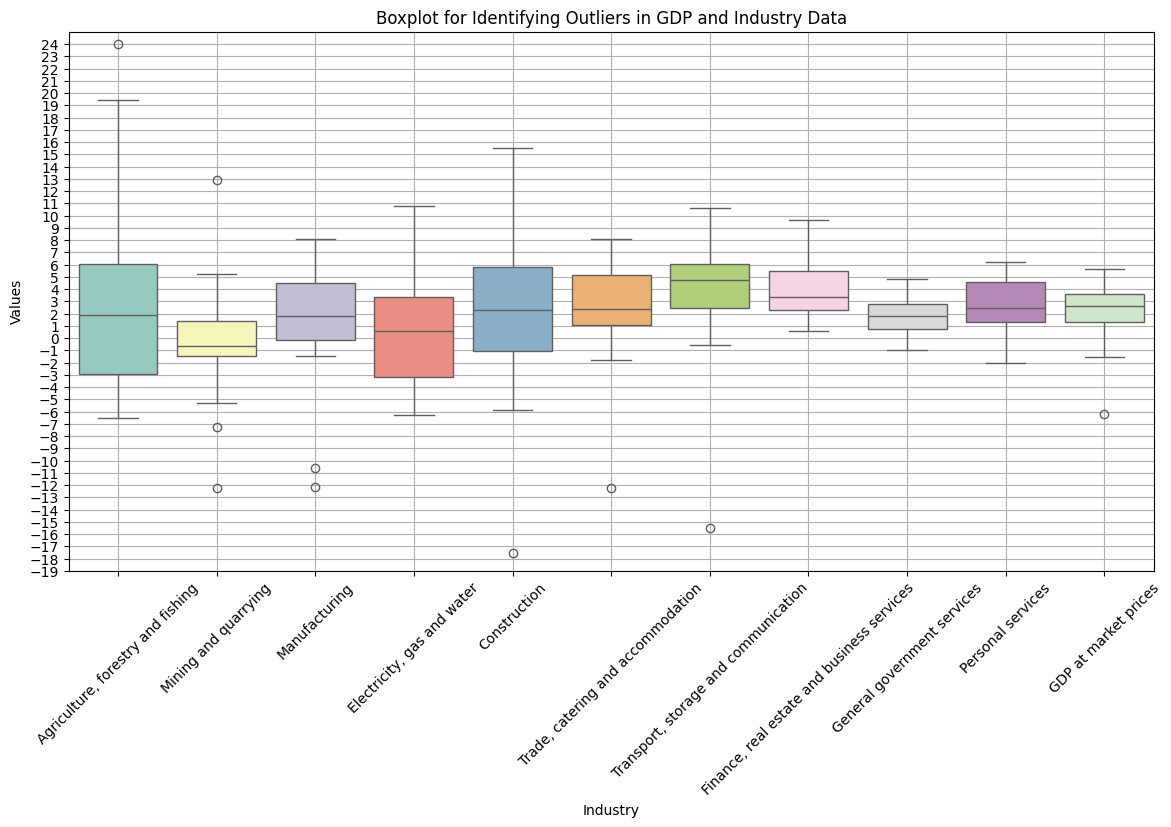

In [89]:
# We drop the 'Year' column as it's not relevant for the boxplot
gdp_data = transposed_df_gdp.drop(columns=['Year'])

# Plot boxplot to identify outliers
plt.figure(figsize=(14, 7))
sns.boxplot(data=gdp_data, palette="Set3")
plt.title('Boxplot for Identifying Outliers in GDP and Industry Data')
plt.xlabel('Industry')
plt.ylabel('Values')
plt.xticks(rotation=45)

plt.ylim(-19, 25)
plt.yticks(range(-19, 25, 1))

# Display the plot
plt.grid(True)
plt.show()


Handle outliers

In [90]:

def preprocess_gdp_data(dataframe, target_column):
    # Step 1: Apply Log Transformation
    # Convert the column to numeric to ensure it's a numeric type
    dataframe[target_column] = pd.to_numeric(dataframe[target_column], errors='coerce')

    # Apply np.log1p to the numeric column
    dataframe[f'{target_column}_log_transformed'] = dataframe[target_column].apply(np.log1p)

    # Step 2: Apply IQR Clipping
    def clip_outliers_with_iqr(series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return series.clip(lower=lower_bound, upper=upper_bound)

    dataframe[f'{target_column}_clipped_iqr'] = clip_outliers_with_iqr(dataframe[f'{target_column}_log_transformed'])

    # Step 3: Apply Winsorization
    def apply_winsorization(series, lower_percentile=0.05, upper_percentile=0.95):
        return winsorize(series, limits=(lower_percentile, 1 - upper_percentile))

    dataframe[f'{target_column}_winsorized'] = apply_winsorization(dataframe[f'{target_column}_log_transformed'], lower_percentile=0.05, upper_percentile=0.95)

    return dataframe

# Process the dataframe
processed_df = preprocess_gdp_data(transposed_df_gdp, 'GDP at market prices')

# Display processed data
print("Processed GDP Data:")
print(processed_df.head())


Processed GDP Data:
Economic Indicator Subcategory  Year Agriculture, forestry and fishing  \
0                               1994                               7.9   
1                               1995                             -19.9   
2                               1996                              24.0   
3                               1997                               0.9   
4                               1998                              -5.3   

Economic Indicator Subcategory Mining and quarrying Manufacturing  \
0                                               0.5           2.7   
1                                              -3.1           6.5   
2                                              -0.8           1.4   
3                                               1.7           2.7   
4                                              -0.1          -0.2   

Economic Indicator Subcategory Electricity, gas and water Construction  \
0                                             

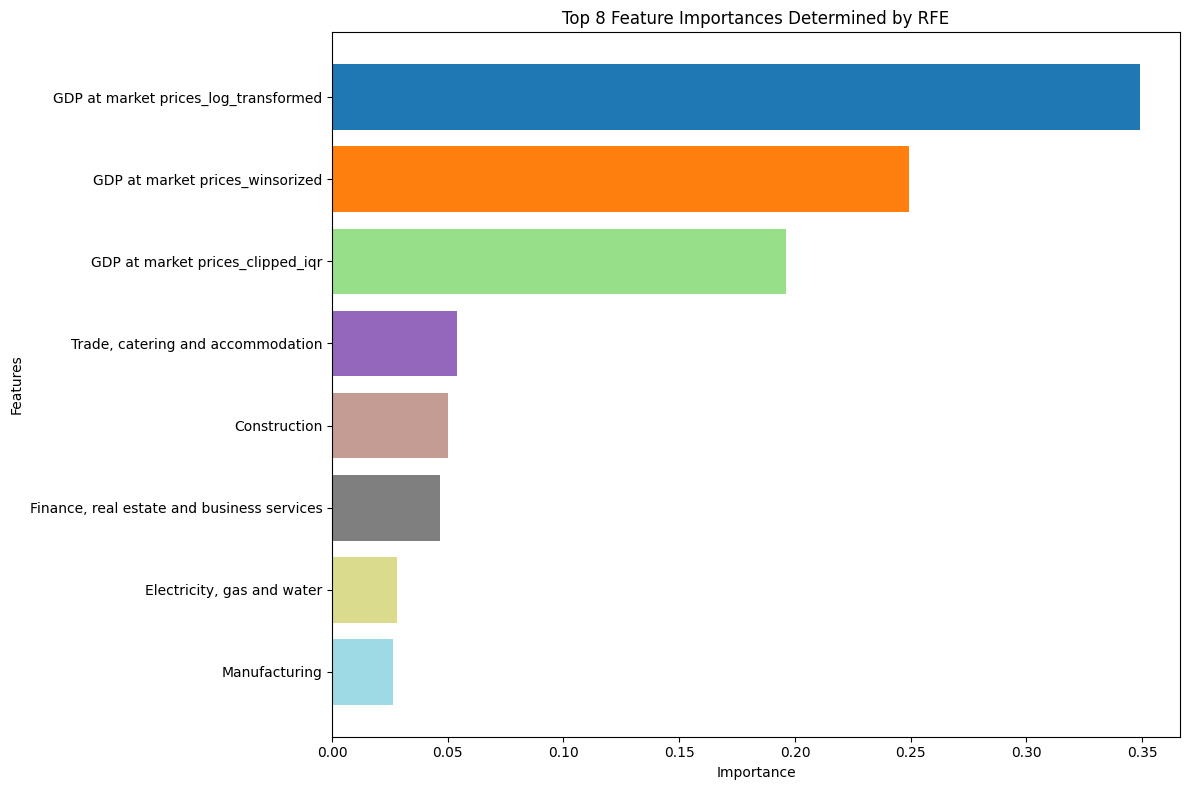

Train set size after scaling and feature selection: (20, 8)
Test set size after scaling and feature selection: (5, 8)
Selected Features:
Index(['Manufacturing', 'Electricity, gas and water', 'Construction',
       'Trade, catering and accommodation',
       'Finance, real estate and business services',
       'GDP at market prices_log_transformed',
       'GDP at market prices_clipped_iqr', 'GDP at market prices_winsorized'],
      dtype='object', name='Economic Indicator Subcategory')


In [91]:

# Function to create lagged features
def create_lag_features(data, target_col, lags=3):
    """
    Create lagged features for a given dataset and target column.
    """
    data = data.copy()
    for lag in range(1, lags + 1):
        data[f'lag_{lag}'] = data[target_col].shift(lag)
    return data.dropna()

# Create lag features for GDP data
lags = 3
target_column = 'GDP at market prices'
gdp_data_with_lags = create_lag_features(processed_df, target_col=target_column, lags=lags)

# Separate features (X) and target (y)
X = gdp_data_with_lags.drop(columns=[target_column])
y = gdp_data_with_lags[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Data scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection using Recursive Feature Elimination (RFE)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rfe_selector = RFE(estimator=rf, n_features_to_select=8, step=1)
rfe_selector.fit(X_train_scaled, y_train)

# Select top features
selected_features = X_train.columns[rfe_selector.support_]
X_train_selected = X_train_scaled[:, rfe_selector.support_]
X_test_selected = X_test_scaled[:, rfe_selector.support_]

# Fit the model on the selected features to get feature importances
rf.fit(X_train_selected, y_train)
feature_importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Generate distinct colors for each bar
colors = plt.cm.tab20(np.linspace(0, 1, len(feature_importance_df)))

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 8 Feature Importances Determined by RFE')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Output the processed data sizes
print(f"Train set size after scaling and feature selection: {X_train_selected.shape}")
print(f"Test set size after scaling and feature selection: {X_test_selected.shape}")

print("Selected Features:")
print(selected_features)

In [92]:

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R2 Score: {r2:.4f}")
    return mse, rmse, r2


Random Forest Regressor Performance:
  MAE: 0.3232
  RMSE: 0.3767
  R² Score: 0.9478


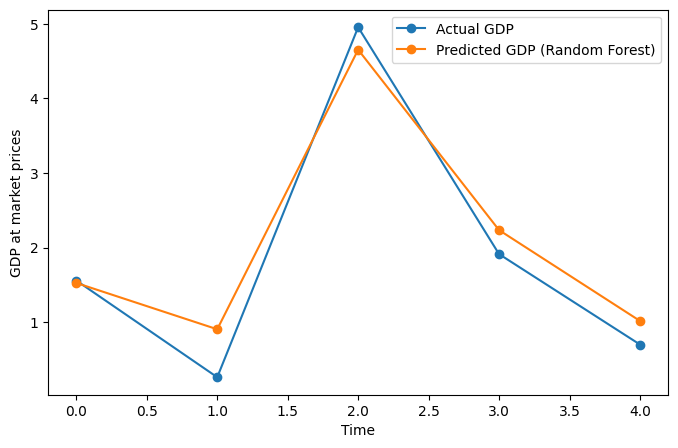

In [93]:

# Define and train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)  # You can tune 'max_depth' and 'n_estimators'
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation metrics
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

# Display results for Random Forest
print("Random Forest Regressor Performance:")
print(f"  MAE: {rf_mae:.4f}")
print(f"  RMSE: {rf_rmse:.4f}")
print(f"  R² Score: {rf_r2:.4f}")

# Visualize predictions vs actuals
plt.figure(figsize=(8, 5))
plt.plot(y_test.reset_index(drop=True), label="Actual GDP", marker="o")
plt.plot(y_pred_rf, label="Predicted GDP (Random Forest)", marker="o")
plt.legend()
#plt.title("Random Forest Predictions vs Actual GDP")
plt.xlabel("Time")
plt.ylabel("GDP at market prices")
plt.show()


Gradient Boosting Regressor Performance:
  MAE: 0.2698
  RMSE: 0.3390
  R² Score: 0.9577


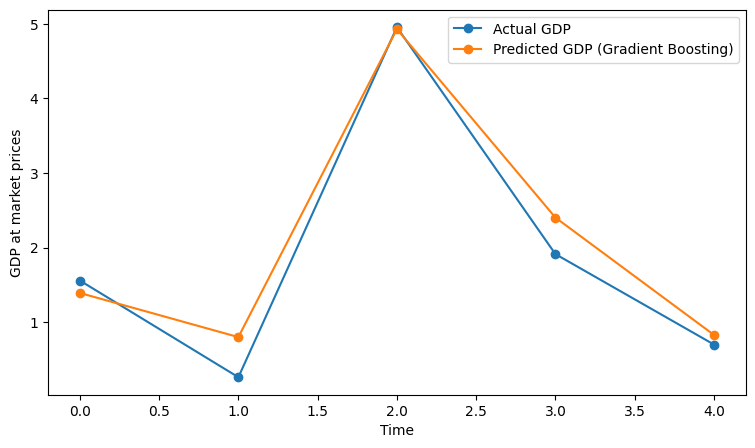

In [94]:

# Define and train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)  # You can tune hyperparameters
gb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluation metrics
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
gb_r2 = r2_score(y_test, y_pred_gb)

# Display results for Gradient Boosting
print("Gradient Boosting Regressor Performance:")
print(f"  MAE: {gb_mae:.4f}")
print(f"  RMSE: {gb_rmse:.4f}")
print(f"  R² Score: {gb_r2:.4f}")

# Visualize predictions vs actuals
plt.figure(figsize=(9, 5))
plt.plot(y_test.reset_index(drop=True), label="Actual GDP", marker="o")
plt.plot(y_pred_gb, label="Predicted GDP (Gradient Boosting)", marker="o")
plt.legend()
#plt.title("Gradient Boosting Predictions vs Actual GDP")
plt.xlabel("Time")
plt.ylabel("GDP at market prices")
plt.show()


Stacking Regressor Performance:
  MAE: 0.4303
  RMSE: 0.4873
  R² Score: 0.9126


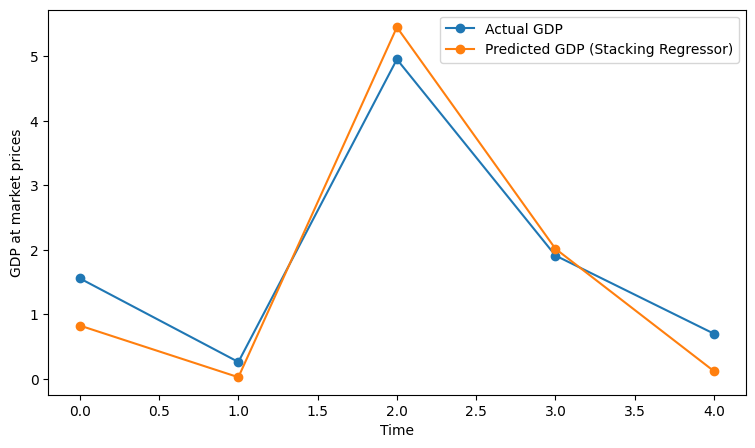

In [95]:
# Define base models
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
]

# Define final estimator
final_estimator = Ridge(alpha=1.0)

# Define stacking model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=final_estimator)

# Train the stacking model
stacking_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_stack = stacking_model.predict(X_test_scaled)

# Evaluation metrics
stack_mae = mean_absolute_error(y_test, y_pred_stack)
stack_rmse = np.sqrt(mean_squared_error(y_test, y_pred_stack))
stack_r2 = r2_score(y_test, y_pred_stack)

# Display results for Stacking Regressor
print("Stacking Regressor Performance:")
print(f"  MAE: {stack_mae:.4f}")
print(f"  RMSE: {stack_rmse:.4f}")
print(f"  R² Score: {stack_r2:.4f}")

# Visualize predictions vs actuals
plt.figure(figsize=(9, 5))
plt.plot(y_test.reset_index(drop=True), label="Actual GDP", marker="o")
plt.plot(y_pred_stack, label="Predicted GDP (Stacking Regressor)", marker="o")
plt.legend()
#plt.title("Stacking Regressor Predictions vs Actual GDP")
plt.xlabel("Time")
plt.ylabel("GDP at market prices")
plt.show()





Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 560ms/step - loss: 9.7848 - val_loss: 4.6357
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 9.5400 - val_loss: 4.4740
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 9.2627 - val_loss: 4.2835
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 8.9568 - val_loss: 4.0509
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 8.5700 - val_loss: 3.7610
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 8.0717 - val_loss: 3.3865
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 7.4500 - val_loss: 2.8889
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 6.6072 - val_loss: 2.2347
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 5.3613 - val_loss: 1.4173
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 3.6991 - val_loss: 0.5837
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 1.6123 - val_loss: 0.4011
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 1.6011 - val_loss: 0.1852

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step

LSTM Model Performance:
  RMSE: 0.4108
  MAE: 0.3876
  R² Score: 0.9063


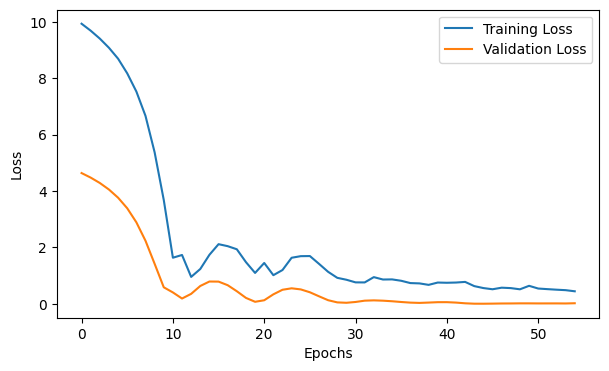

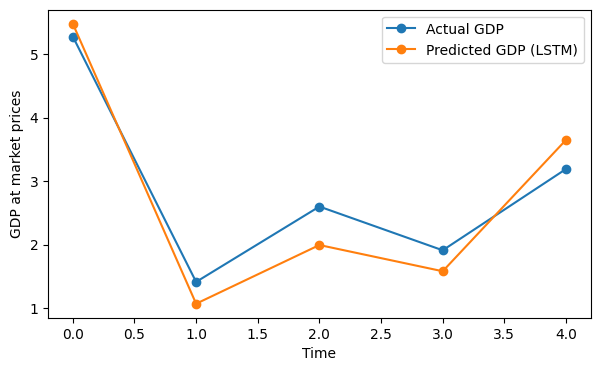

In [96]:

# Set seeds for reproducibility
os.environ['PYTHONHASHSEED'] = '42'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Ensure deterministic operations (Optional: May slightly affect performance)
tf.config.experimental.enable_op_determinism()


# Assuming X and y are already prepared
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Reshape for LSTM (3D input)
X_train_lstm = np.expand_dims(X_train, axis=2)
X_test_lstm = np.expand_dims(X_test, axis=2)

# Build the LSTM model
def build_lstm(input_shape):
    model = Sequential([
        LSTM(64, activation='relu', return_sequences=True, input_shape=input_shape, kernel_initializer='glorot_uniform'),
        Dropout(0.2),
        LSTM(32, activation='relu', kernel_initializer='glorot_uniform'),
        Dense(1, kernel_initializer='glorot_uniform')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Initialize and train the LSTM model
lstm_model = build_lstm((X_train_lstm.shape[1], X_train_lstm.shape[2]))

# Add early stopping for stable training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = lstm_model.fit(
    X_train_lstm, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    callbacks=[early_stopping]
)

# Save the trained model using the new Keras format
lstm_model.save('lstm_model.keras')  # Use .keras format

# Reload the model for predictions
loaded_model = tf.keras.models.load_model('lstm_model.keras')  # Use the updated file extension

# Make predictions
y_pred_lstm = loaded_model.predict(X_test_lstm).flatten()

# Evaluate the LSTM model
lstm_mse = mean_squared_error(y_test, y_pred_lstm)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(y_test, y_pred_lstm)
lstm_r2 = r2_score(y_test, y_pred_lstm)

print("\nLSTM Model Performance:")
print(f"  RMSE: {lstm_rmse:.4f}")
print(f"  MAE: {lstm_mae:.4f}")
print(f"  R² Score: {lstm_r2:.4f}")

# Plot training and validation loss
plt.figure(figsize=(7, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
#plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot predictions vs actual values
plt.figure(figsize=(7, 4))
plt.plot(y_test.values, label='Actual GDP', marker='o', linestyle='-')
plt.plot(y_pred_lstm, label='Predicted GDP (LSTM)', marker='o', linestyle='-')
#plt.title('LSTM Predictions vs Actual GDP')
plt.xlabel('Time')
plt.ylabel('GDP at market prices')
plt.legend()
plt.show()




Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 816ms/step - loss: 10.3001 - val_loss: 4.8184
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 9.8763 - val_loss: 4.5164
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 9.4580 - val_loss: 4.2330
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 9.0305 - val_loss: 3.9254
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 8.5083 - val_loss: 3.5689
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 7.9865 - val_loss: 3.1558
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 7.1951 - val_loss: 2.6754
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 6.3377 - val_loss: 2.1253
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 5.0549 - val_loss: 1.4885
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 3.5562 - val_loss: 0.7659
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 2.5994 - val_loss: 0.5043
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 1.3746 - val_loss: 0.6

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step

Bi-LSTM Model Performance:
  RMSE: 0.5757
  MAE: 0.3767
  R² Score: 0.8160


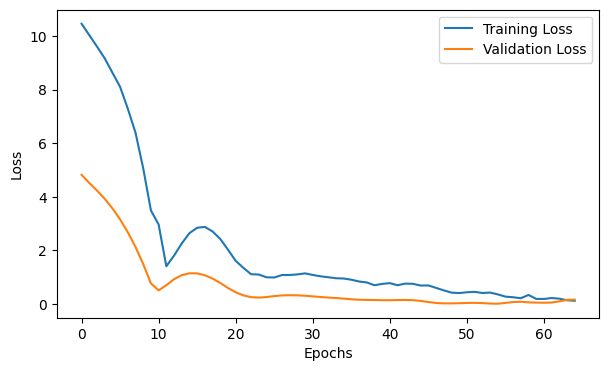

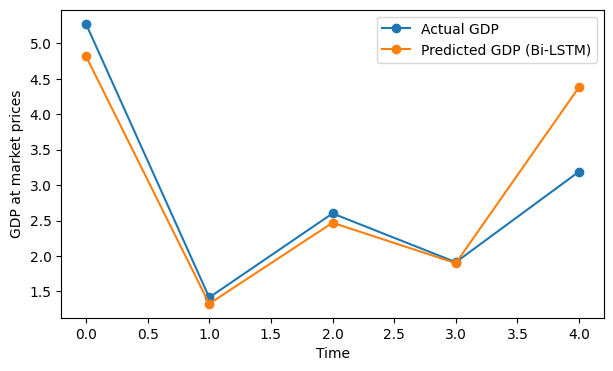

In [97]:
# Set seeds for reproducibility
os.environ['PYTHONHASHSEED'] = '42'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Ensure deterministic operations (Optional: May slightly affect performance)
tf.config.experimental.enable_op_determinism()

# Prepare your data (example setup, adjust as per your data)
# Assuming X and y are already prepared
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Reshape for LSTM (3D input)
X_train_lstm = np.expand_dims(X_train, axis=2)
X_test_lstm = np.expand_dims(X_test, axis=2)

# Build the Bi-LSTM model
def build_bilstm(input_shape):
    model = Sequential([
        Bidirectional(LSTM(64, activation='relu', return_sequences=True, kernel_initializer='glorot_uniform'), input_shape=input_shape),
        Dropout(0.2),
        Bidirectional(LSTM(32, activation='relu', kernel_initializer='glorot_uniform')),
        Dense(1, kernel_initializer='glorot_uniform')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Initialize and train the Bi-LSTM model
bilstm_model = build_bilstm((X_train_lstm.shape[1], X_train_lstm.shape[2]))

# Add early stopping for stable training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = bilstm_model.fit(
    X_train_lstm, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    callbacks=[early_stopping]
)

# Save the trained model using the new Keras format
bilstm_model.save('bilstm_model.keras')  # Use .keras format

# Reload the model for predictions
loaded_model = tf.keras.models.load_model('bilstm_model.keras')  # Use the updated file extension

# Make predictions

# Make predictions
y_pred_bilstm = loaded_model.predict(X_test_lstm).flatten()

# Evaluate the Bi-LSTM model
bilstm_mse = mean_squared_error(y_test, y_pred_bilstm)
bilstm_rmse = np.sqrt(bilstm_mse)
bilstm_mae = mean_absolute_error(y_test, y_pred_bilstm)
bilstm_r2 = r2_score(y_test, y_pred_bilstm)

print("\nBi-LSTM Model Performance:")
print(f"  RMSE: {bilstm_rmse:.4f}")
print(f"  MAE: {bilstm_mae:.4f}")
print(f"  R² Score: {bilstm_r2:.4f}")

# Plot training and validation loss
plt.figure(figsize=(7, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
#plt.title('Bi-LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot predictions vs actual values
plt.figure(figsize=(7, 4))
plt.plot(y_test.values, label='Actual GDP', marker='o', linestyle='-')
plt.plot(y_pred_bilstm, label='Predicted GDP (Bi-LSTM)', marker='o', linestyle='-')
#plt.title('Bi-LSTM Predictions vs Actual GDP')
plt.xlabel('Time')
plt.ylabel('GDP at market prices')
plt.legend()
plt.show()

ADF Statistic: -3.5135515923081844
p-value: 0.007645805327553286
The series is stationary.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

Best ARIMA Parameters: (2, 0, 4), RMSE: 1.3165

Optimized ARIMA Model Performance:
  MAE: 0.9618
  RMSE: 1.0820
  R² Score: 0.3502


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


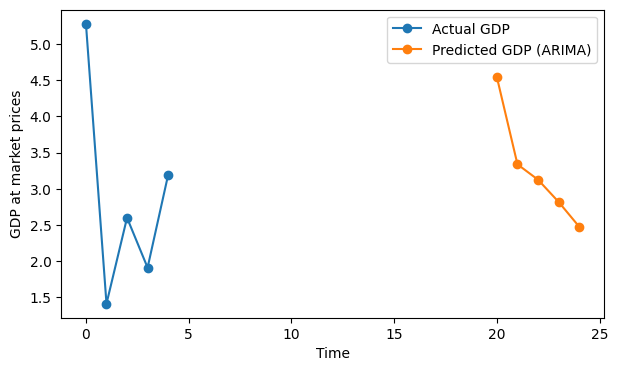

In [98]:
# Function to check stationarity
def check_stationarity(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] > 0.05:
        print("The series is not stationary. Differencing is needed.")
        return False
    print("The series is stationary.")
    return True

# Function for differencing
def difference_series(series):
    return series.diff().dropna()

# Function to perform grid search for ARIMA parameters
def tune_arima_params(y_train, max_p=5, max_d=2, max_q=5):
    best_score, best_cfg = float("inf"), None
    results = []

    # Define the parameter grid
    p = range(0, max_p + 1)
    d = range(0, max_d + 1)
    q = range(0, max_q + 1)
    parameter_combinations = list(itertools.product(p, d, q))

    for params in parameter_combinations:
        try:
            # Fit ARIMA model
            model = ARIMA(y_train, order=params)
            model_fit = model.fit()
            rmse = np.sqrt(mean_squared_error(y_train[-len(model_fit.fittedvalues):], model_fit.fittedvalues))
            results.append((params, rmse))

            if rmse < best_score:
                best_score, best_cfg = rmse, params
        except Exception as e:
            continue

    print(f"Best ARIMA Parameters: {best_cfg}, RMSE: {best_score:.4f}")
    return best_cfg, results

# Check stationarity
if not check_stationarity(y_train):
    y_train = difference_series(y_train)

# Perform ARIMA parameter tuning
best_params, tuning_results = tune_arima_params(y_train)

# Fit the ARIMA model with best parameters
arima_model = ARIMA(y_train, order=best_params)
arima_fit = arima_model.fit()

# Forecasting for the test set
arima_preds= arima_fit.forecast(steps=len(y_test))

# Evaluate ARIMA with best parameters
arima_mae = mean_absolute_error(y_test, arima_preds)
arima_rmse = np.sqrt(mean_squared_error(y_test, arima_preds))
arima_r2 = r2_score(y_test, arima_preds)

print("\nOptimized ARIMA Model Performance:")
print(f"  MAE: {arima_mae:.4f}")
print(f"  RMSE: {arima_rmse:.4f}")
print(f"  R² Score: {arima_r2:.4f}")

# Plot predictions vs actuals with confidence intervals
plt.figure(figsize=(7, 4))
# Convert y_test to pandas Series for reset_index
plt.plot(pd.Series(y_test).reset_index(drop=True), label="Actual GDP", marker="o", linestyle="-")
plt.plot(arima_preds, label="Predicted GDP (ARIMA)", marker="o", linestyle="-")

plt.legend()
#plt.title("ARIMA Predictions vs Actual GDP")
plt.xlabel("Time")
plt.ylabel("GDP at market prices")
plt.show()



Hybrid Stacking Model Performance:
  MAE: 0.1602
  RMSE: 0.2074
  R² Score: 0.9761


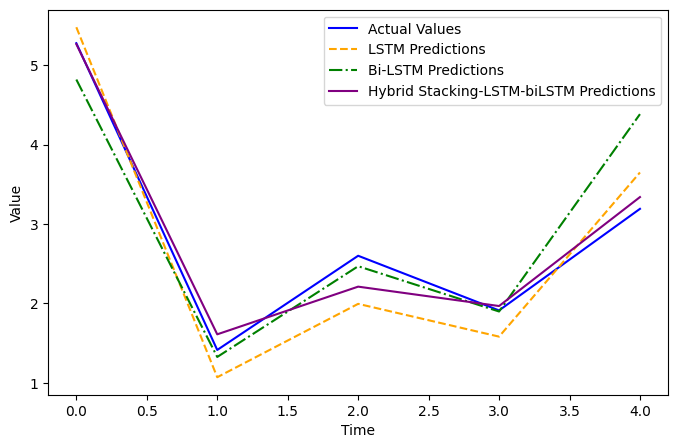

In [99]:
# Ensure predictions are aligned
min_len = min(len(y_pred_lstm), len(y_pred_bilstm), len(y_test))
y_pred_lstm = y_pred_lstm[:min_len]
y_pred_bilstm = y_pred_bilstm[:min_len]
y_test = y_test[:min_len]

# Combine predictions into meta-features
meta_features = np.vstack([y_pred_lstm, y_pred_bilstm]).T

# Meta-learner: Linear Regression
meta_model = LinearRegression()
meta_model.fit(meta_features, y_test)

# Final predictions
stack_hybrid_preds = meta_model.predict(meta_features)

# Evaluate the Hybrid Stacking Model
stack_hybrid_mae = mean_absolute_error(y_test, stack_hybrid_preds)
stack_hybrid_rmse = np.sqrt(mean_squared_error(y_test, stack_hybrid_preds))
stack_hybrid_r2 = r2_score(y_test, stack_hybrid_preds)

print("\nHybrid Stacking Model Performance:")
print(f"  MAE: {stack_hybrid_mae:.4f}")
print(f"  RMSE: {stack_hybrid_rmse:.4f}")
print(f"  R² Score: {stack_hybrid_r2:.4f}")

# Plot Results
plt.figure(figsize=(8, 5))
plt.plot(range(len(y_test)), y_test, label="Actual Values", color="blue")
plt.plot(range(len(y_pred_lstm)), y_pred_lstm, label="LSTM Predictions", linestyle="--", color="orange")
plt.plot(range(len(y_pred_bilstm)), y_pred_bilstm, label="Bi-LSTM Predictions", linestyle="-.", color="green")
plt.plot(range(len(stack_hybrid_preds)), stack_hybrid_preds, label="Hybrid Stacking-LSTM-biLSTM Predictions", color="purple")
plt.legend()
#plt.title("Hybrid Stacking + LSTM + BI-LSTM Model Predictions vs Actual Values")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()



Hybrid Model Performance:
  MAE: 0.1235
  RMSE: 0.1622
  R² Score: 0.9854


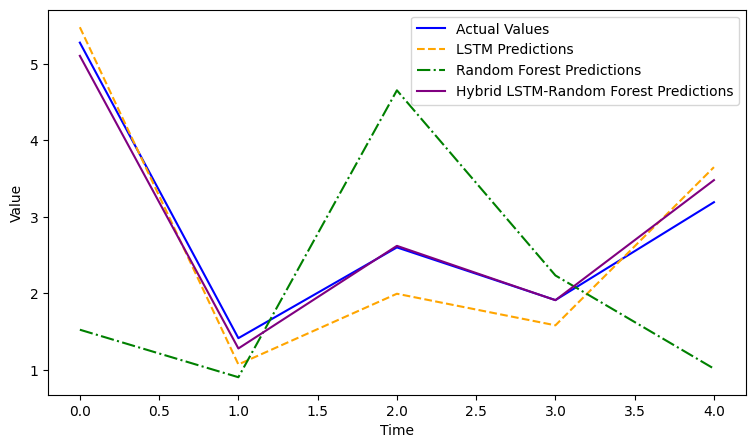

In [100]:

# Ensure predictions are aligned
min_len = min(len(y_pred_lstm), len(y_pred_rf), len(y_test))
y_pred_lstm = y_pred_lstm[:min_len]
y_pred_rf = y_pred_rf[:min_len]
y_test = y_test[:min_len]

# Combine predictions into meta-features
meta_features = np.vstack([y_pred_lstm, y_pred_rf]).T

# Meta-learner: Linear Regression
meta_model = LinearRegression()
meta_model.fit(meta_features, y_test)

# Final predictions from the hybrid model
lstm_hybrid_preds = meta_model.predict(meta_features)

# Evaluate the Hybrid Model
lstm_hybrid_mae = mean_absolute_error(y_test, lstm_hybrid_preds)
lstm_hybrid_rmse = np.sqrt(mean_squared_error(y_test, lstm_hybrid_preds))
lstm_hybrid_r2 = r2_score(y_test, lstm_hybrid_preds)

print("\nHybrid Model Performance:")
print(f"  MAE: {lstm_hybrid_mae:.4f}")
print(f"  RMSE: {lstm_hybrid_rmse:.4f}")
print(f"  R² Score: {lstm_hybrid_r2:.4f}")

# Plot Results
plt.figure(figsize=(9, 5))
plt.plot(range(len(y_test)), y_test, label="Actual Values", color="blue")
plt.plot(range(len(y_pred_lstm)), y_pred_lstm, label="LSTM Predictions", linestyle="--", color="orange")
plt.plot(range(len(y_pred_rf)), y_pred_rf, label="Random Forest Predictions", linestyle="-.", color="green")
plt.plot(range(len(lstm_hybrid_preds)), lstm_hybrid_preds, label="Hybrid LSTM-Random Forest Predictions", color="purple")
plt.legend()
#plt.title("Hybrid LSTM + Random Forest Predictions vs Actual Values")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


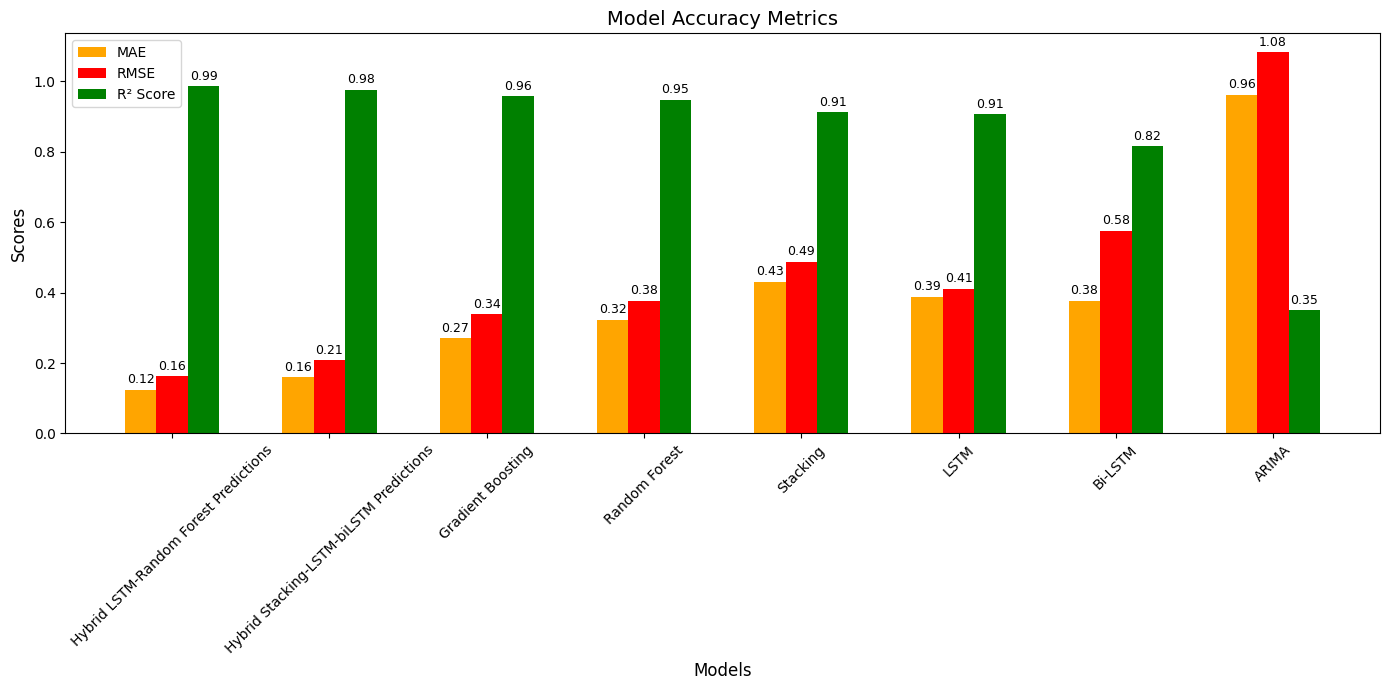


Sorted Model Performance:
                                     Model       MAE      RMSE        R²
7    Hybrid LSTM-Random Forest Predictions  0.123528  0.162242  0.985391
6  Hybrid Stacking-LSTM-biLSTM Predictions  0.160189  0.207426  0.976120
3                        Gradient Boosting  0.269791  0.338975  0.957699
2                            Random Forest  0.323176  0.376726  0.947753
4                                 Stacking  0.430320  0.487323  0.912573
0                                     LSTM  0.387638  0.410811  0.906332
1                                  Bi-LSTM  0.376713  0.575719  0.816037
5                                    ARIMA  0.961763  1.082030  0.350190


In [103]:
# Define model names, excluding GB Hybrid
models = [
    'LSTM',
    'Bi-LSTM',
    'Random Forest',
    'Gradient Boosting',
    'Stacking',
    'ARIMA',
    'Hybrid Stacking-LSTM-biLSTM Predictions',
    'Hybrid LSTM-Random Forest Predictions'

]

# Metrics for each model (excluding GB Hybrid)
mae = [
    lstm_mae,
    bilstm_mae,
    rf_mae,
    gb_mae,
    stack_mae,
    arima_mae,
    stack_hybrid_mae,
    lstm_hybrid_mae
]
rmse = [
    lstm_rmse,
    bilstm_rmse,
    rf_rmse,
    gb_rmse,
    stack_rmse,
    arima_rmse,
    stack_hybrid_rmse,
    lstm_hybrid_rmse
]
r2 = [
    lstm_r2,
    bilstm_r2,
    rf_r2,
    gb_r2,
    stack_r2,
    arima_r2,
    stack_hybrid_r2,
    lstm_hybrid_r2
]

# Create a DataFrame for sorting
results_df = pd.DataFrame({
    'Model': models,
    'MAE': mae,
    'RMSE': rmse,
    'R²': r2
})

# Sort by R² (descending), then MAE and RMSE (ascending)
sorted_results = results_df.sort_values(by=['R²', 'MAE', 'RMSE'], ascending=[False, True, True])

# Extract sorted data for visualization
sorted_models = sorted_results['Model']
sorted_mae = sorted_results['MAE']
sorted_rmse = sorted_results['RMSE']
sorted_r2 = sorted_results['R²']

# Update label locations based on sorted data
x = np.arange(len(sorted_models))
bar_width = 0.2  # Width of bars

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot MAE, RMSE, and R² Score
bars_mae = ax.bar(x - bar_width, sorted_mae, bar_width, label='MAE', color='orange')
bars_rmse = ax.bar(x, sorted_rmse, bar_width, label='RMSE', color='red')
bars_r2 = ax.bar(x + bar_width, sorted_r2, bar_width, label='R² Score', color='green')

# Add the scores above each bar
for bars, scores in zip([bars_mae, bars_rmse, bars_r2], [sorted_mae, sorted_rmse, sorted_r2]):
    for bar, score in zip(bars, scores):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.01,
            f'{score:.2f}',
            ha='center', va='bottom', fontsize=9
        )

# Set labels, title, and ticks
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Model Accuracy Metrics', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(sorted_models, fontsize=10, rotation=45)
ax.legend(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

# Print the sorted results for comparison
print("\nSorted Model Performance:")
print(sorted_results)



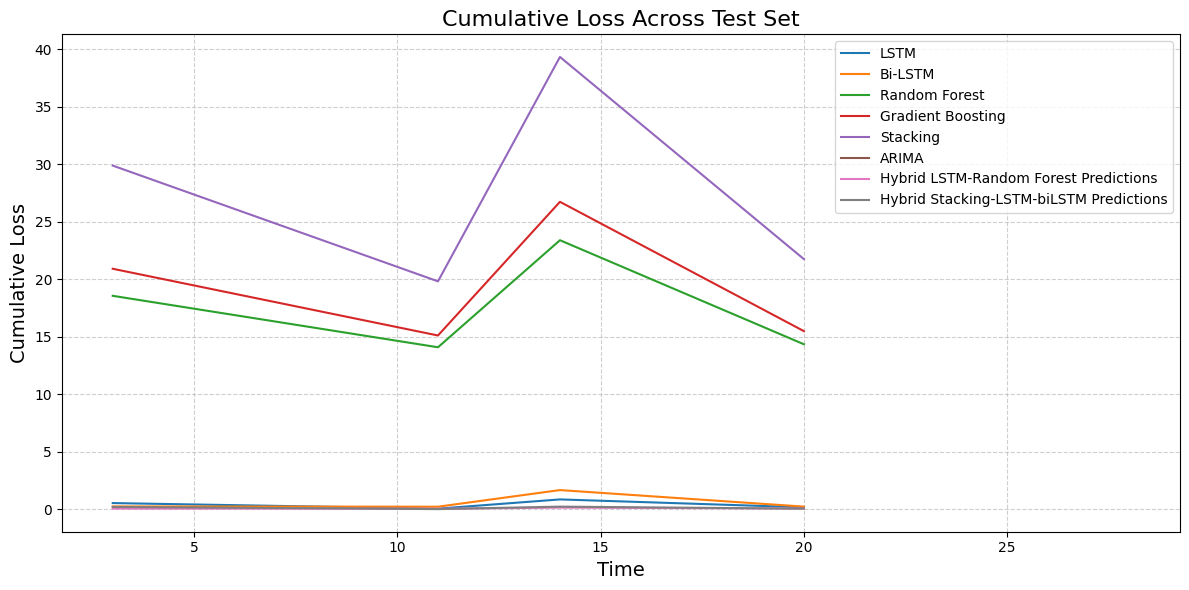

In [104]:
# Model names
models = [
    'LSTM',
    'Bi-LSTM',
    'Random Forest',
    'Gradient Boosting',
    'Stacking',
    'ARIMA',
    'Hybrid LSTM-Random Forest Predictions',
    'Hybrid Stacking-LSTM-biLSTM Predictions'
]

predictions = {
    'LSTM': y_pred_lstm,
    'Bi-LSTM': y_pred_bilstm,
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb,
    'Stacking': y_pred_stack,
    'ARIMA': arima_preds,
    'Hybrid LSTM-Random Forest Predictions': lstm_hybrid_preds,
    'Hybrid Stacking-LSTM-biLSTM Predictions': stack_hybrid_preds,

}

# Actual values
actual = y_test

# Initialize a dictionary to store cumulative losses
cumulative_losses = {}

# Calculate cumulative loss for each model
for model, pred in predictions.items():
    squared_errors = (actual - pred) ** 2  # Squared errors
    cumulative_loss = np.cumsum(squared_errors)  # Cumulative sum of squared errors
    cumulative_losses[model] = cumulative_loss

# Convert cumulative losses to a DataFrame for better handling
cumulative_loss_df = pd.DataFrame(cumulative_losses)

# Plot cumulative loss for all models
plt.figure(figsize=(12, 6))

for model in models:
    plt.plot(cumulative_loss_df.index, cumulative_loss_df[model], label=model)

# Customize the plot
plt.title("Cumulative Loss Across Test Set", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cumulative Loss", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
